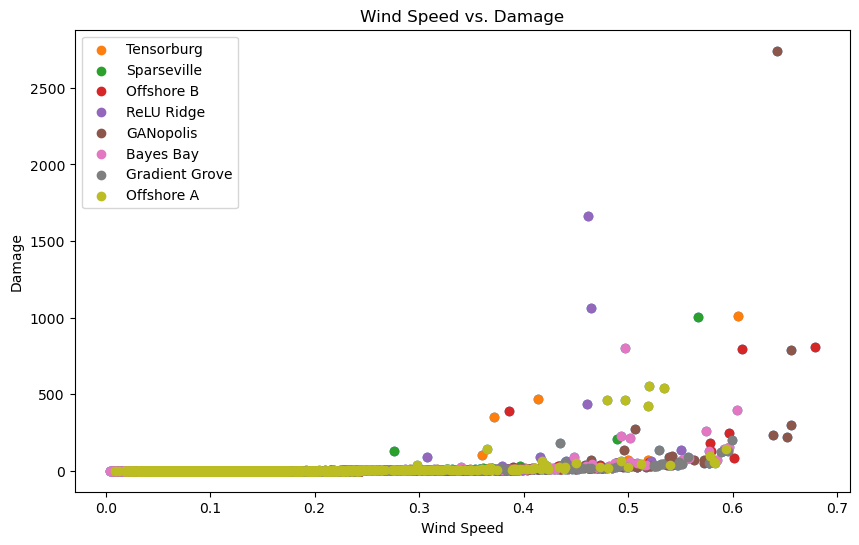

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = './data/training_data.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df['windspeed'], df['damage'])

# Set labels and title
plt.xlabel('Wind Speed')
plt.ylabel('Damage')
plt.title('Wind Speed vs. Damage')

# Add a legend (optional, as this is a simple scatterplot)
# If you want to differentiate between cities, you could use different colors
# Here's an example for cities:
for city in df['city'].unique():
    city_df = df[df['city'] == city]
    plt.scatter(city_df['windspeed'], city_df['damage'], label=city)

plt.legend()

plt.show()


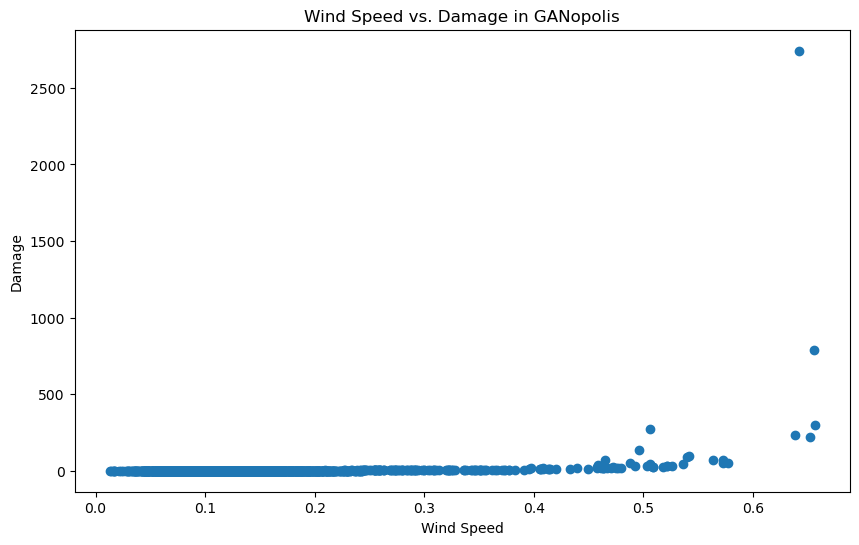

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = './data/training_data.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Filter the dataset for GANopolis
ganopolis_data = df[df['city'] == 'GANopolis']

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(ganopolis_data['windspeed'], ganopolis_data['damage'])

# Set labels and title
plt.xlabel('Wind Speed')
plt.ylabel('Damage')
plt.title('Wind Speed vs. Damage in GANopolis')

plt.show()


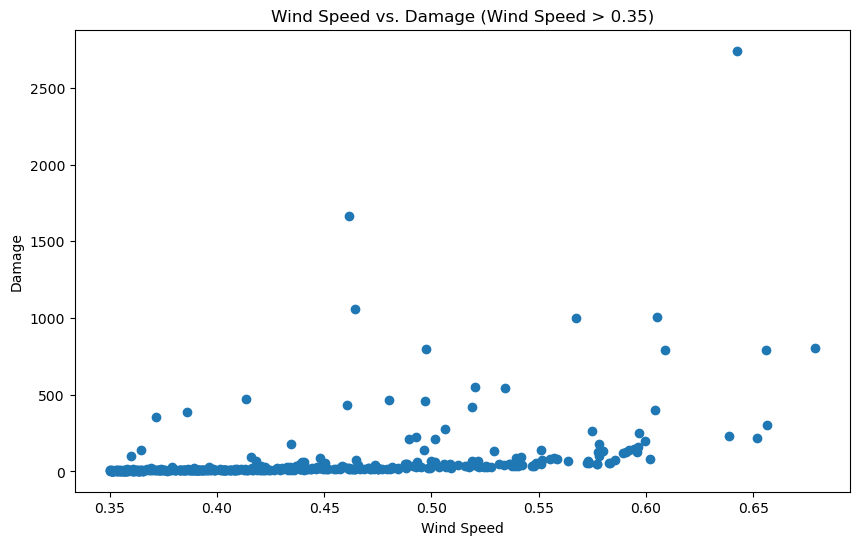

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = './data/training_data.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Filter the dataset for wind speed over 0.35
df_filtered = df[df['windspeed'] > 0.35]

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['windspeed'], df_filtered['damage'])

# Set labels and title
plt.xlabel('Wind Speed')
plt.ylabel('Damage')
plt.title('Wind Speed vs. Damage (Wind Speed > 0.35)')

plt.show()

In [4]:
# Principal Component Analysis
from sklearn.decomposition import PCA

# Filter numeric columns
ganopolis_numeric = ganopolis_data.select_dtypes(include=['number'])

# Apply PCA
n_components = min(ganopolis_numeric.shape[0], ganopolis_numeric.shape[1])  # Ensure valid number of components
pca = PCA(n_components=2)  # Change number of components as needed
X_pca = pca.fit_transform(ganopolis_numeric)

# Create a new DataFrame with PCA results
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Print results
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print(pca_df.head())  # Show first few rows of PCA results

Explained Variance Ratio: [0.99113974 0.00874805]
           PC1       PC2
0 -1128.442301 -6.939741
1 -1127.443326 -6.860889
2 -1126.444166 -6.835248
3 -1125.445028 -6.803008
4 -1124.445685 -6.829984


In [5]:
# Compute correlation with 'damages'
correlation_matrix = ganopolis_numeric.corr()

# Extract only the correlations with 'damages'
damages_correlation = correlation_matrix['damage'].sort_values(ascending=False)  # Sort for better readability

# Print results
print(damages_correlation)

damage         1.000000
windspeed      0.265412
velocity_y     0.068260
hour_of_day   -0.006806
air_temp      -0.009521
ground_temp   -0.025744
day           -0.036634
hour          -0.036704
pressure      -0.071783
velocity_x    -0.246246
Name: damage, dtype: float64


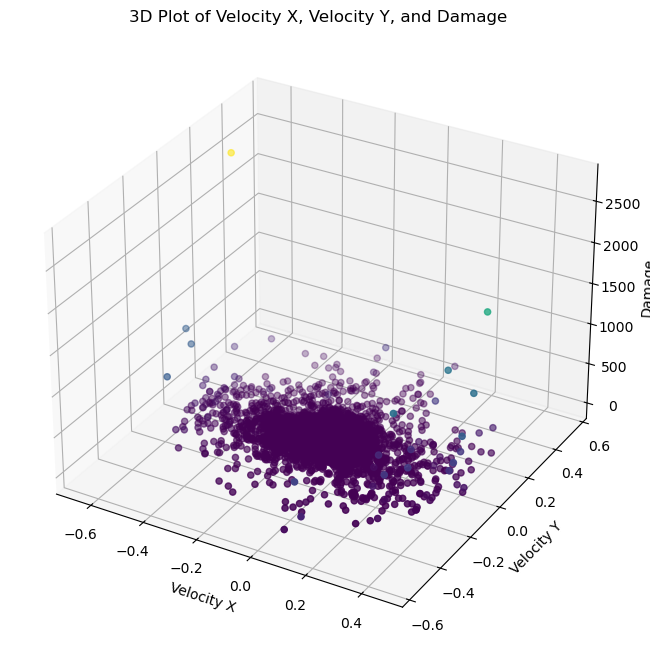

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
file_path = './data/training_data.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['velocity_x'], df['velocity_y'], df['damage'], c=df['damage'], cmap='viridis')

# Set labels
ax.set_xlabel('Velocity X')
ax.set_ylabel('Velocity Y')
ax.set_zlabel('Damage')
ax.set_title('3D Plot of Velocity X, Velocity Y, and Damage')

plt.show()

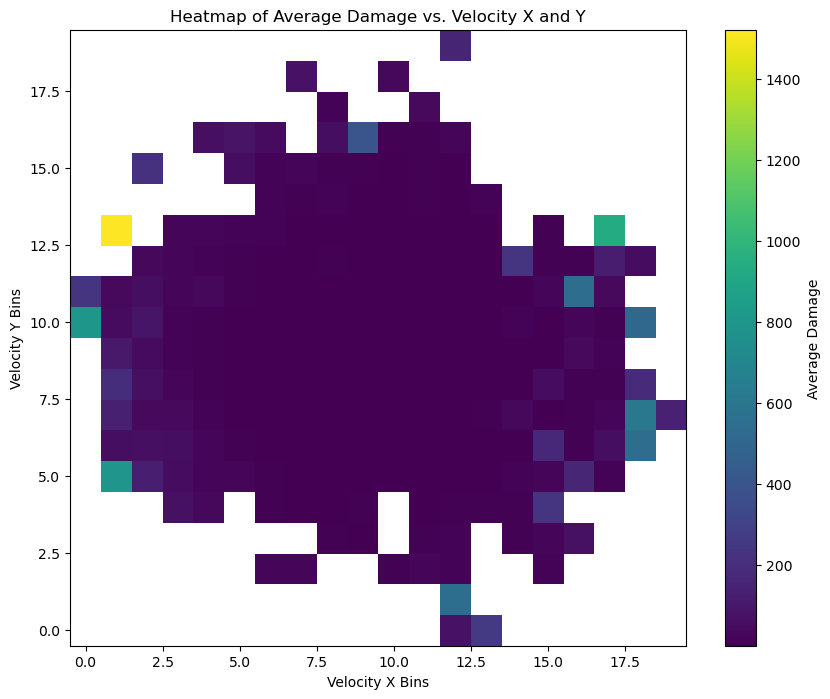

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = './data/training_data.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Discretize velocity_x and velocity_y into bins
bins_x = np.linspace(df['velocity_x'].min(), df['velocity_x'].max(), 20)
bins_y = np.linspace(df['velocity_y'].min(), df['velocity_y'].max(), 20)

# Create a grid of bins
x_bins = np.digitize(df['velocity_x'], bins_x)
y_bins = np.digitize(df['velocity_y'], bins_y)

# Create a pivot table to calculate average damage per bin
pivot_table = pd.pivot_table(df, values='damage', index=y_bins, columns=x_bins, aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(pivot_table, cmap='viridis', origin='lower', interpolation='nearest')
plt.colorbar(label='Average Damage')

# Set labels
plt.xlabel('Velocity X Bins')
plt.ylabel('Velocity Y Bins')
plt.title('Heatmap of Average Damage vs. Velocity X and Y')

plt.show()
